In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sns.set_theme(style='whitegrid')
pd.options.mode.chained_assignment = None  # Supress warning, default='warn'

# Read Data

In [2]:
df = pd.read_csv('../data/preprocessed/accepted_2007_to_2018Q4_preprocessed.csv')
print(f"Shape of df: {df.shape}")
df.head(5)

Shape of df: (1345310, 101)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,10.0,MORTGAGE,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,10.0,MORTGAGE,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,10.0,MORTGAGE,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,3.0,MORTGAGE,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
4,11950.0,11950.0,11950.0,36,13.44,405.18,C,C3,4.0,RENT,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


# Preprocessing

In [3]:
# Select only numeric attributes first
# TODO: Include also categorical values but encode them first!
df = df.select_dtypes([np.number])

# Fill NaNs with Median
df = df.fillna(df.median())

# Preview
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,3600.0,3600.0,36,13.99,123.03,10.0,55000.0,0,5.91,...,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,24700.0,24700.0,36,11.99,820.28,10.0,65000.0,0,16.06,...,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,20000.0,20000.0,60,10.78,432.66,10.0,63000.0,0,10.78,...,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,10400.0,10400.0,10400.0,60,22.45,289.91,3.0,104433.0,0,25.37,...,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
4,11950.0,11950.0,11950.0,36,13.44,405.18,4.0,34000.0,0,10.20,...,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0


## Data Split

In [4]:
# Fraction of test data
TEST_SIZE = 0.3

X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=1997, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (941717, 88)
Shape of X_test: (403593, 88)
Shape of y_train: (941717,)
Shape of y_test: (403593,)


## Scale Data

In [5]:
# Init object
scaler = StandardScaler()
# Scale X_train
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.head(5)

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,-1.152367,-1.151919,-1.149012,-0.563661,-0.026841,-1.110779,0.287232,-0.485986,-0.892698,-0.362623,...,-0.171852,1.018006,0.659137,0.614594,-0.35461,-0.131363,-0.839936,-0.696632,-0.320656,-0.796593
1,2.153819,2.155715,2.157652,1.774117,0.694300,1.449070,0.566430,0.862696,0.612028,-0.362623,...,-0.171852,0.462190,0.659137,1.205706,-0.35461,-0.131363,-0.152515,1.087189,0.283468,1.491959
2,1.557387,1.559021,1.561133,1.774117,0.817984,0.993616,1.124826,1.014078,-0.225710,1.920589,...,3.912790,-1.205259,-0.672513,-0.334597,-0.35461,-0.131363,3.038517,0.948475,-0.797347,1.686703
3,-0.507187,-0.506457,-0.503740,-0.563661,-1.060335,-0.473924,0.008034,-0.362127,1.306586,-0.362623,...,-0.171852,0.462190,0.226935,0.341772,-0.35461,2.380595,-0.573706,-0.373701,-0.188504,-0.282918
4,-1.043403,-1.042908,-1.040033,-0.563661,0.434354,-0.966392,1.124826,-0.499748,1.329708,-0.362623,...,-0.171852,-1.205259,0.659137,0.992565,-0.35461,-0.131363,-0.682125,-0.285584,-0.438648,-0.166748


## Fit Model

In [6]:
lr = LogisticRegression(fit_intercept=True, max_iter=300, solver="saga")
lr.fit(X_train_scaled, y_train)

# Print coefficients and intercept
print(f"Intercept: {lr.intercept_}")
print(f"Coefficients: {lr.coef_}")

Intercept: [-2.95012107]
Coefficients: [[ 1.69316920e+00  1.70670732e+00  1.69674909e+00  5.32669700e-01
   8.82175638e-04  1.59458457e+00  6.26876177e-03 -3.75491101e-02
   7.24294968e-02 -2.36301260e-02  4.66906454e-02  4.67368951e-02
   2.77661346e-06  2.48217533e-03  3.60677571e-02  3.29261910e-03
   3.70010615e-02 -4.83846765e-02  7.65697074e-02  0.00000000e+00
   0.00000000e+00 -2.48927982e+00 -2.47422405e+00 -3.46740003e+00
   1.03355983e+00  1.52646479e-01  2.40403271e+00  2.14607591e+00
  -2.21365029e+00 -1.58071485e+00  3.23764919e-03  1.28174273e-02
  -1.56894377e-03  0.00000000e+00 -2.44605530e-02  1.31958895e-02
  -3.92429676e-02 -1.97922252e-02  9.46093379e-03 -9.29046182e-02
   8.41760170e-02  6.05625879e-02 -1.82086661e-02  7.96903133e-03
   1.66502379e-03  1.73087268e-02 -5.17561081e-02  1.26489739e-02
   9.52629624e-03 -1.63531157e-02  2.63198929e-02 -3.17533268e-03
  -1.46815750e-02 -2.64701071e-03  4.36712397e-02  2.50677210e-02
   1.84167842e-03 -1.58740548e-03  1.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


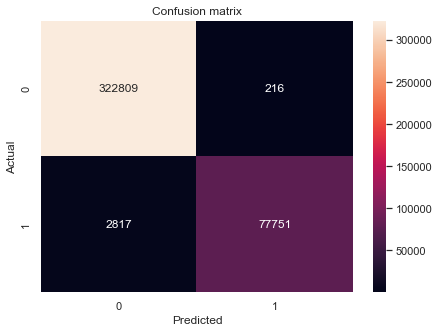

________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    323025
           1       1.00      0.97      0.98     80568

    accuracy                           0.99    403593
   macro avg       0.99      0.98      0.99    403593
weighted avg       0.99      0.99      0.99    403593

Information:
Precision: Percentage of correct positive predictions relative to total positive predictions
Recall: Percentage of correct positive predictions relative to total actual positives.
F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.
________________________________________________________________________________


In [7]:
# Scale Test Samples
X_test_scaled = scaler.transform(X_test)

# Predict in-sample values
y_pred = lr.predict(X_test_scaled)

# Plot Confusion matrics
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Heatmap plot settings
plt.figure(figsize=(7,5))
plt.title("Confusion matrix")
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot classification report
print(80 * "_")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Information:")
print("Precision: Percentage of correct positive predictions relative to total positive predictions")
print("Recall: Percentage of correct positive predictions relative to total actual positives.")
print("F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.")
print(80 * "_")